In [7]:
%matplotlib notebook
import xarray as xr
import proplot as plot
import matplotlib.pyplot as plt

In [35]:
path = '/gpfsstore/rech/goe/ufz23bm/IGCM_OUT/LMDZ/ELI-144x142x79-zoomx2-himalaya-test/ATM/Output/'

# Grid

In [36]:
ds = xr.open_dataset(path+'Grid/ELI-144x142x79-zoomx2-himalaya-test_1979_grilles_gcm.nc')
ds

<xarray.Dataset>
Dimensions:   (latu: 143, latv: 142, lev: 79, lonu: 145, lonv: 145)
Coordinates:
  * lonu      (lonu) float32 183.04218 186.01128 ... 540.08936 543.0422
  * lonv      (lonv) float32 181.56366 184.52477 ... 538.6194 541.56366
  * latu      (latu) float32 90.0 88.50914 87.02068 ... -88.49235 -90.0
  * latv      (latv) float32 89.25429 87.7646 86.27743 ... -87.738525 -89.24618
Dimensions without coordinates: lev
Data variables:
    grille_u  (latu, lonu) float32 ...
    grille_v  (latv, lonv) float32 ...
    grille_s  (latu, lonv) float32 ...
    presnivs  (lev) float32 ...
    phis      (latu, lonv) float32 ...
    aire      (latu, lonv) float32 ...
    mask      (latu, lonv) int32 ...

In [34]:
ds.mask

<xarray.DataArray 'mask' (latu: 143, lonv: 145)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)
Coordinates:
  * lonv     (lonv) float32 181.56366 184.52477 187.50156 ... 538.6194 541.56366
  * latu     (latu) float32 90.0 88.50914 87.02068 ... -88.49235 -90.0

<IPython.core.display.Javascript object>


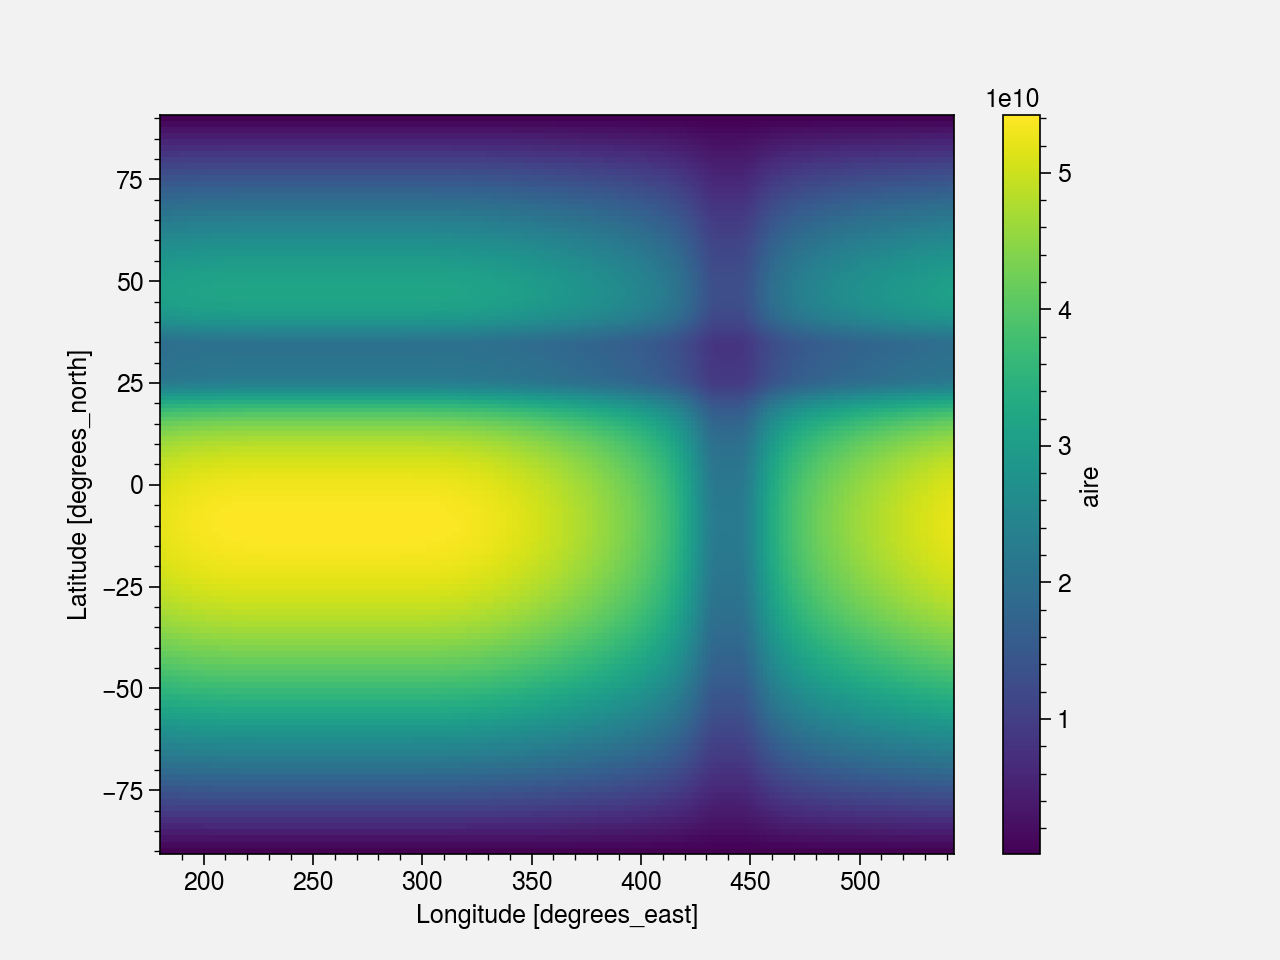

In [8]:
ds.aire.plot()

<IPython.core.display.Javascript object>


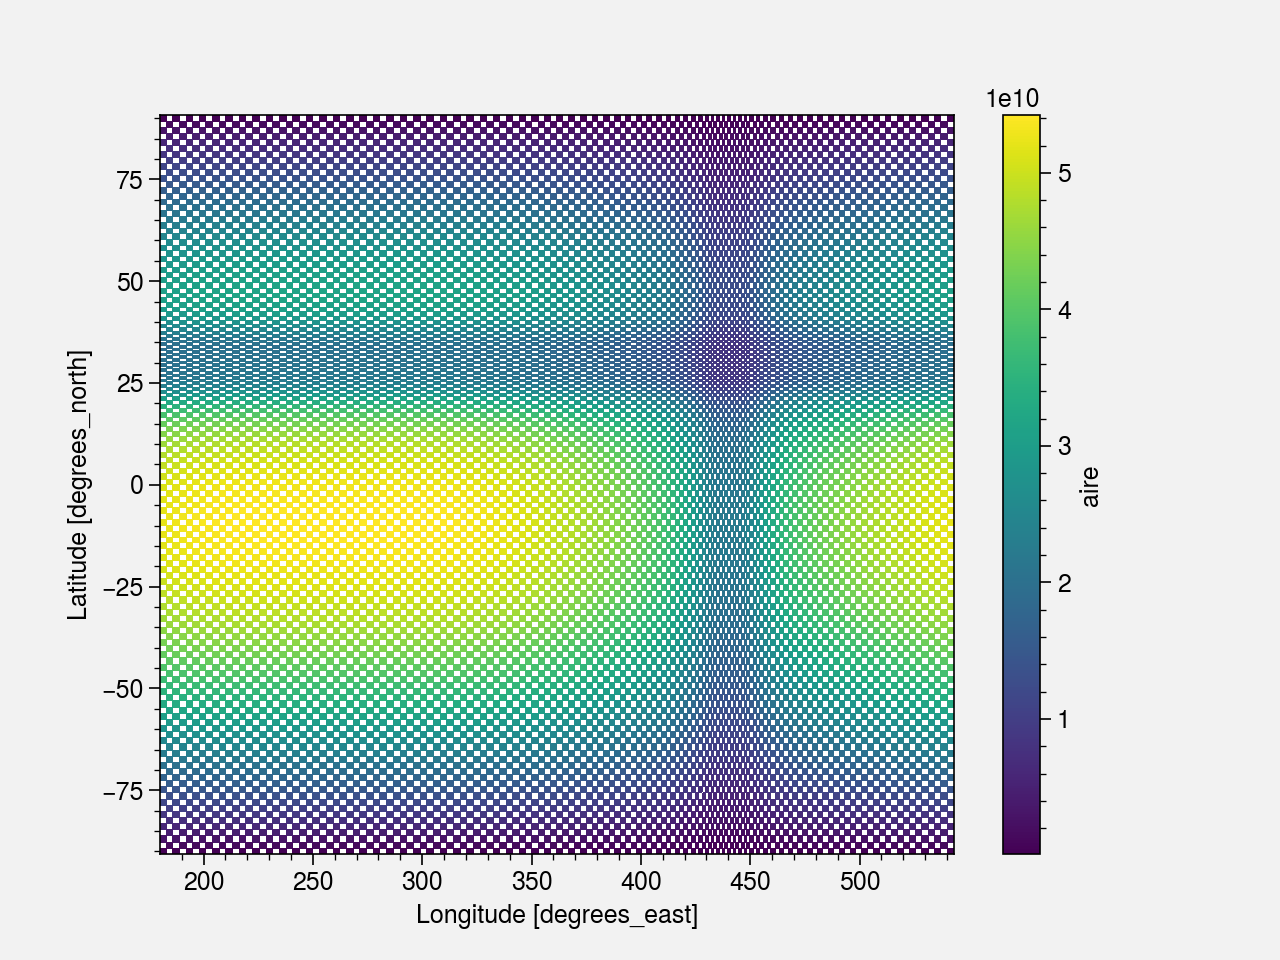

In [9]:
plt.figure()
(ds.aire.where(abs(ds.grille_s-1) > 0.5)).plot()

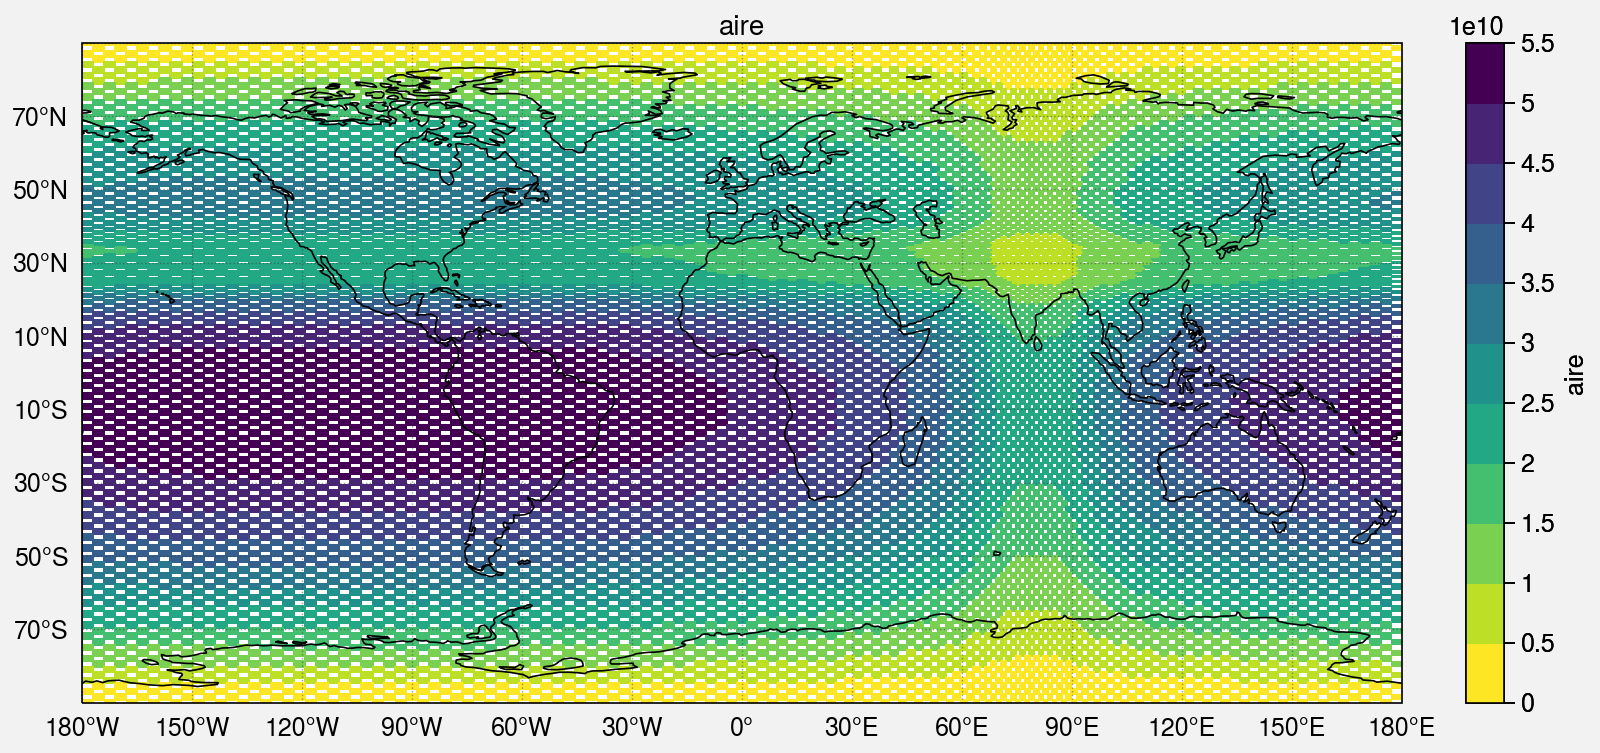

In [10]:
%matplotlib inline

# See init.sh -> grid.pdf (dans INITIAL)
f, axs = plot.subplots(proj='cyl', width=8)

axs[0].pcolormesh(ds.aire.where(abs(ds.grille_s-1) > 0.5), colorbar='r', cmap='viridis_r')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, coast=True
)

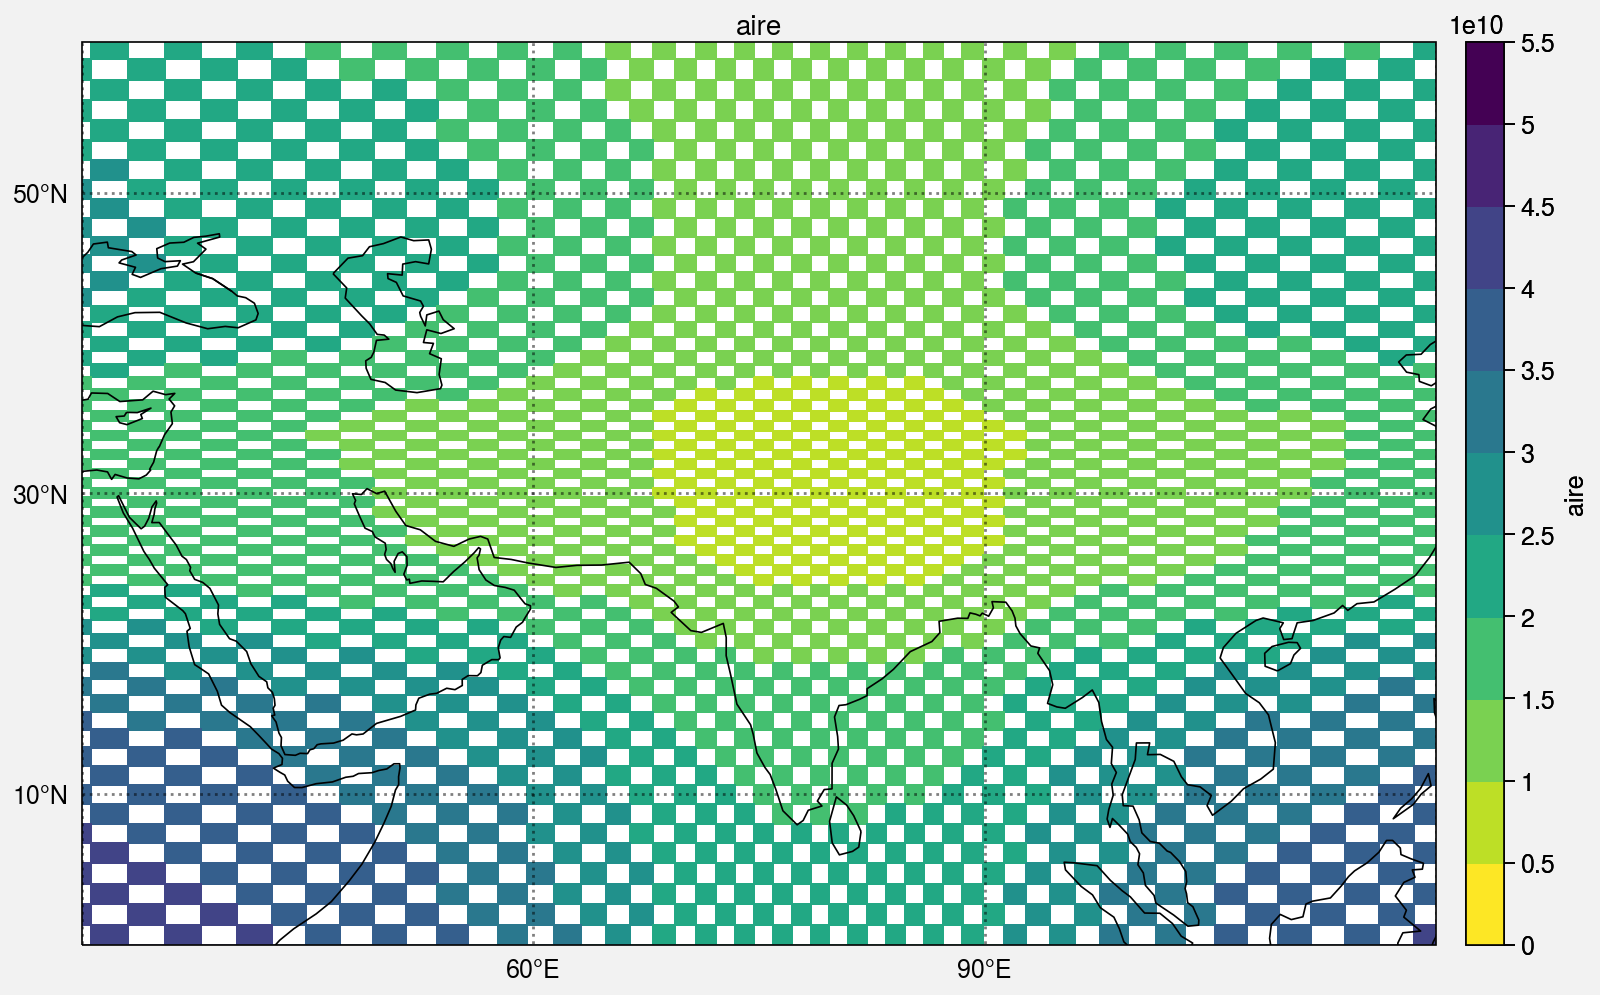

In [22]:
f, axs = plot.subplots(proj='cyl', width=8)

axs[0].pcolormesh(ds.aire.where(abs(ds.grille_s-1) > 0.5), colorbar='r', cmap='viridis_r')

axs.format(labels=True, coast=True, lonlim=(30,120), latlim=(0,60))

# Ozone

In [96]:
ds = xr.open_dataset(path+'Boundary/ELI-144x142x79-zoomx2-himalaya-test_1980_climoz_LMDZ.nc')
ds

<xarray.Dataset>
Dimensions:  (plev: 66, rlatu: 143, rlonv: 144, time: 14)
Coordinates:
  * rlonv    (rlonv) float32 -178.43634 -175.47523 ... 175.69302 178.61938
  * rlatu    (rlatu) float32 -90.0 -88.49235 -86.984695 ... 88.50914 90.0
  * plev     (plev) float32 1e-04 0.0003 0.0005 0.0008 ... 850.0 925.0 1000.0
  * time     (time) datetime64[ns] 1999-12-16T12:00:00 ... 2001-01-16T12:00:00
Data variables:
    tro3     (time, plev, rlatu, rlonv) float32 ...
Attributes:
    Conventions:  CF-1.6
    title:        CCMI v1.0 dataset prepared for input4MIPs
    institution:  University of Reading, Reading RG6 6UA, UK
    source:       CCMI v1.0: merged ozone using WACCM and CMAM ozone simulations
    comment:      Regridded for LMDZ

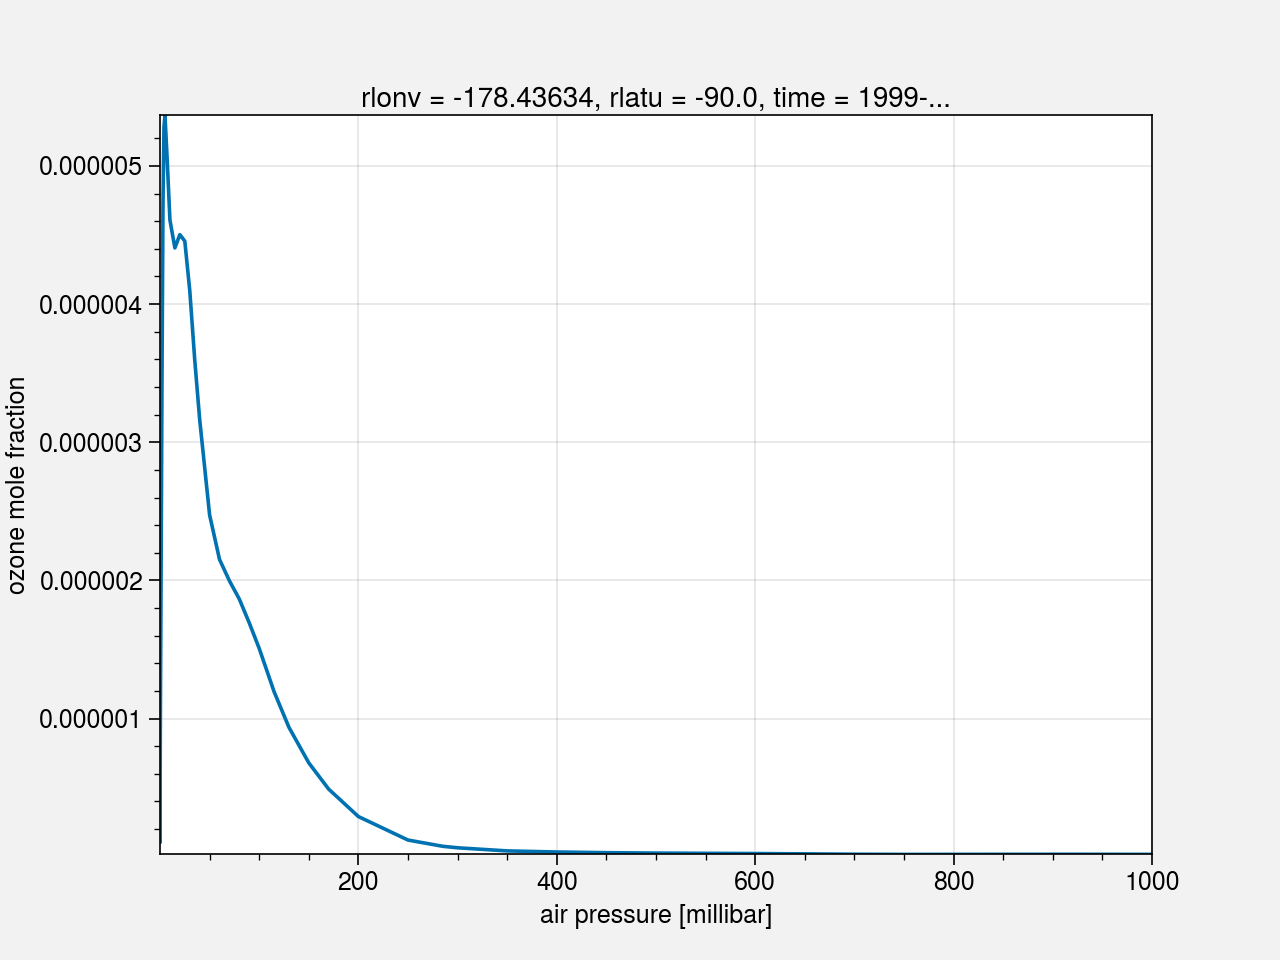

In [97]:
ds.tro3.isel(time=0, rlatu=0, rlonv=0).plot()

In [100]:
ds.tro3.plev

<xarray.DataArray 'plev' (plev: 66)>
array([1.00e-04, 3.00e-04, 5.00e-04, 8.00e-04, 1.00e-03, 1.50e-03, 2.00e-03,
       3.00e-03, 4.00e-03, 5.00e-03, 7.00e-03, 1.00e-02, 1.50e-02, 2.00e-02,
       3.00e-02, 4.00e-02, 5.00e-02, 7.00e-02, 1.00e-01, 1.50e-01, 2.00e-01,
       3.00e-01, 4.00e-01, 5.00e-01, 7.00e-01, 1.00e+00, 1.50e+00, 2.00e+00,
       3.00e+00, 4.00e+00, 5.00e+00, 7.00e+00, 1.00e+01, 1.50e+01, 2.00e+01,
       2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 5.00e+01, 6.00e+01, 7.00e+01,
       8.00e+01, 9.00e+01, 1.00e+02, 1.15e+02, 1.30e+02, 1.50e+02, 1.70e+02,
       2.00e+02, 2.50e+02, 2.85e+02, 3.00e+02, 3.50e+02, 4.00e+02, 4.50e+02,
       5.00e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02, 7.80e+02, 8.00e+02,
       8.50e+02, 9.25e+02, 1.00e+03], dtype=float32)
Coordinates:
  * plev     (plev) float32 1e-04 0.0003 0.0005 0.0008 ... 850.0 925.0 1000.0
Attributes:
    units:          millibar
    standard_name:  air_pressure
    long_name:      air pressure

In [98]:
ds.tro3.isel(time=0, plev=64, rlatu=30)

<xarray.DataArray 'tro3' (rlonv: 144)>
array([2.052880e-08, 2.039860e-08, 2.012080e-08, 1.979692e-08, 1.943811e-08,
       1.905713e-08, 1.864080e-08, 1.827281e-08, 1.799349e-08, 1.780979e-08,
       1.772178e-08, 1.762651e-08, 1.752601e-08, 1.746663e-08, 1.739876e-08,
       1.729214e-08, 1.708148e-08, 1.695669e-08, 1.687952e-08, 1.681738e-08,
       1.671543e-08, 1.659389e-08, 1.662477e-08, 1.671011e-08, 1.674989e-08,
       1.677131e-08, 1.679465e-08, 1.683633e-08, 1.691301e-08, 1.694631e-08,
       1.694429e-08, 1.701675e-08, 1.706773e-08, 1.707288e-08, 1.679216e-08,
       1.799000e-08, 1.951380e-08, 2.054300e-08, 2.090209e-08, 2.071068e-08,
       2.043515e-08, 2.016467e-08, 1.982766e-08, 1.952706e-08, 1.919103e-08,
       1.891908e-08, 1.864547e-08, 1.835103e-08, 1.809167e-08, 1.786155e-08,
       1.765737e-08, 1.753075e-08, 1.747721e-08, 1.745789e-08, 1.744651e-08,
       1.740321e-08, 1.737069e-08, 1.735185e-08, 1.734931e-08, 1.734931e-08,
       1.734931e-08, 1.734931e-08, 1.

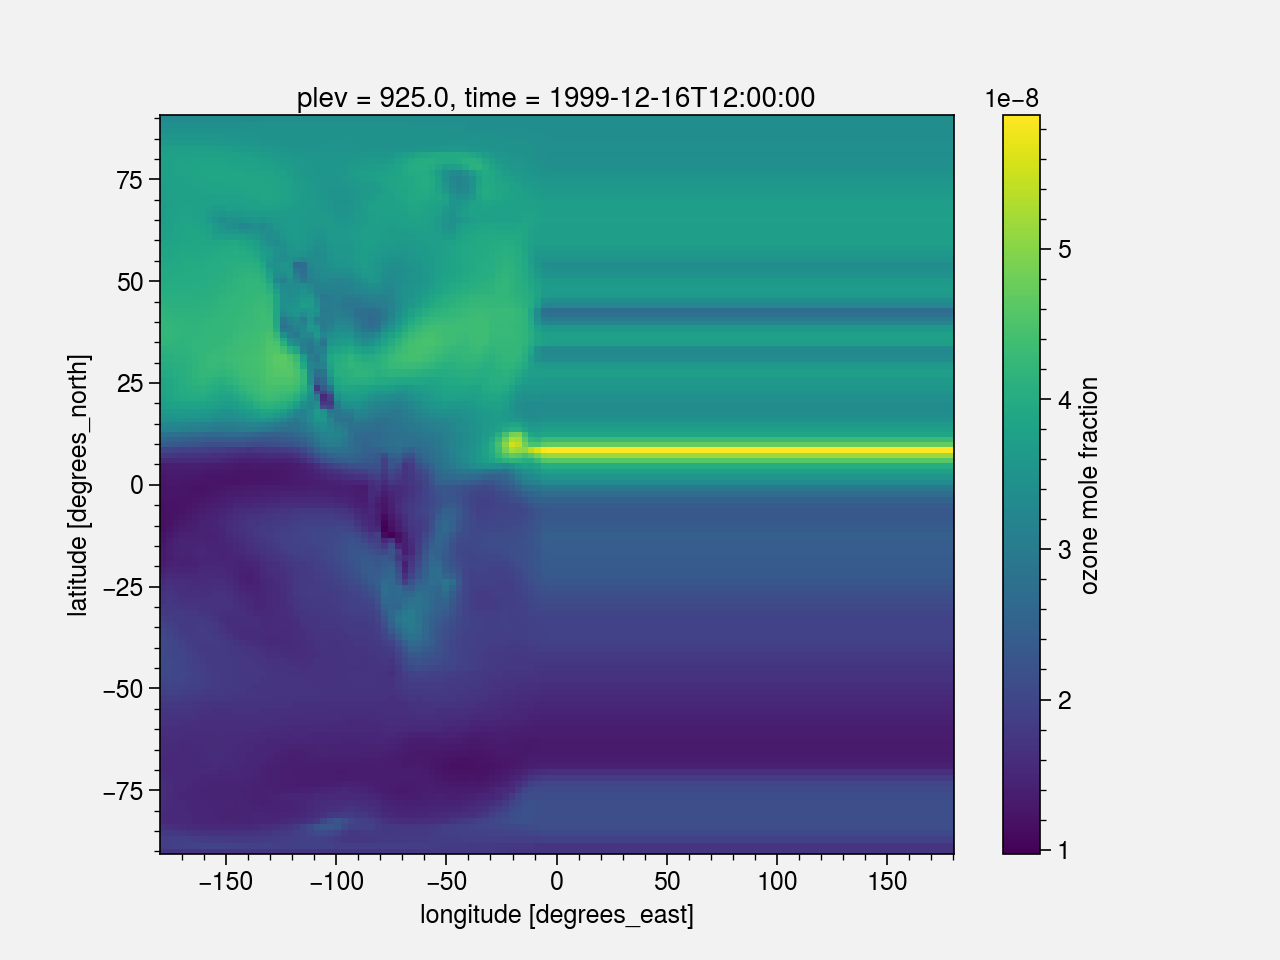

In [99]:
ds.tro3.isel(time=0, plev=64).plot()

# Limit

In [57]:
ds = xr.open_dataset(path+'Boundary/ELI-144x142x79-zoomx2-himalaya-test_1979_limit.nc')
ds

<xarray.Dataset>
Dimensions:    (points_physiques: 20306, time: 365)
Dimensions without coordinates: points_physiques, time
Data variables:
    TEMPS      (time) float64 ...
    FOCE       (time, points_physiques) float64 ...
    FSIC       (time, points_physiques) float64 ...
    FTER       (time, points_physiques) float64 ...
    FLIC       (time, points_physiques) float64 ...
    SST        (time, points_physiques) float64 ...
    BILS       (time, points_physiques) float64 ...
    ALB        (time, points_physiques) float64 ...
    RUG        (time, points_physiques) float64 ...
    longitude  (points_physiques) float32 ...
    latitude   (points_physiques) float32 ...
Attributes:
    title:    Fichier conditions aux limites
    history:  File produced using ce0l executable.\nSea Ice Concentration bui...

In [59]:
ds.latitude

<xarray.DataArray 'latitude' (points_physiques: 20306)>
array([ 90.     ,  88.50914,  88.50914, ..., -88.49235, -88.49235, -90.     ],
      dtype=float32)
Dimensions without coordinates: points_physiques
Attributes:
    standard_name:  latitude
    units:          degrees_north

In [58]:
ds.longitude

<xarray.DataArray 'longitude' (points_physiques: 20306)>
array([   0.     , -178.43634, -175.47523, ...,  175.69302,  178.61938,
          0.     ], dtype=float32)
Dimensions without coordinates: points_physiques
Attributes:
    standard_name:  longitude
    units:          degrees_east

In [79]:
20306/142

143.0

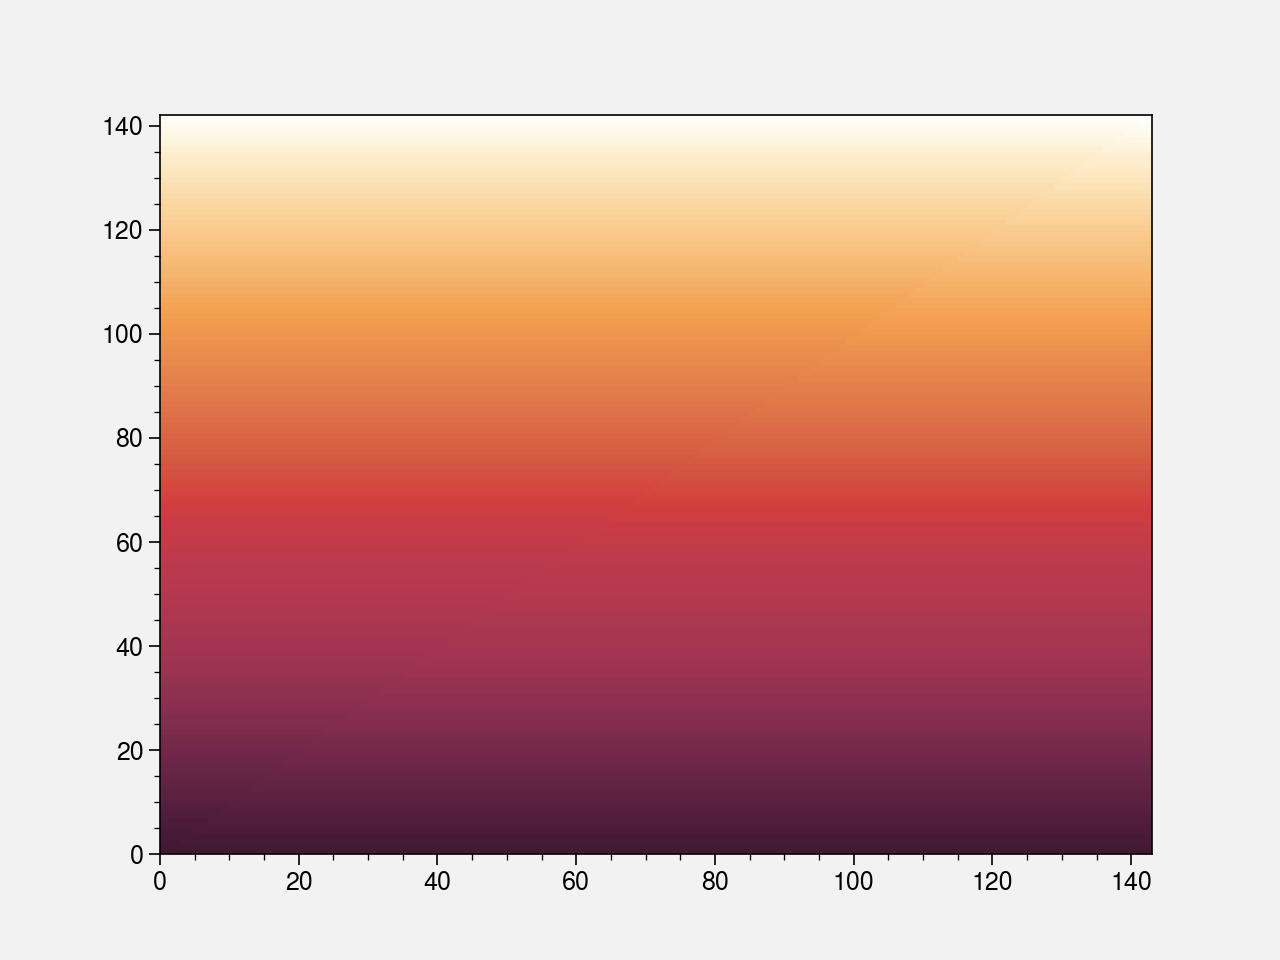

In [83]:
plt.pcolormesh(ds.latitude.values.reshape(142, 143))

In [90]:
ds.longitude

<xarray.DataArray 'longitude' (points_physiques: 20306)>
array([   0.     , -178.43634, -175.47523, ...,  175.69302,  178.61938,
          0.     ], dtype=float32)
Dimensions without coordinates: points_physiques
Attributes:
    standard_name:  longitude
    units:          degrees_east

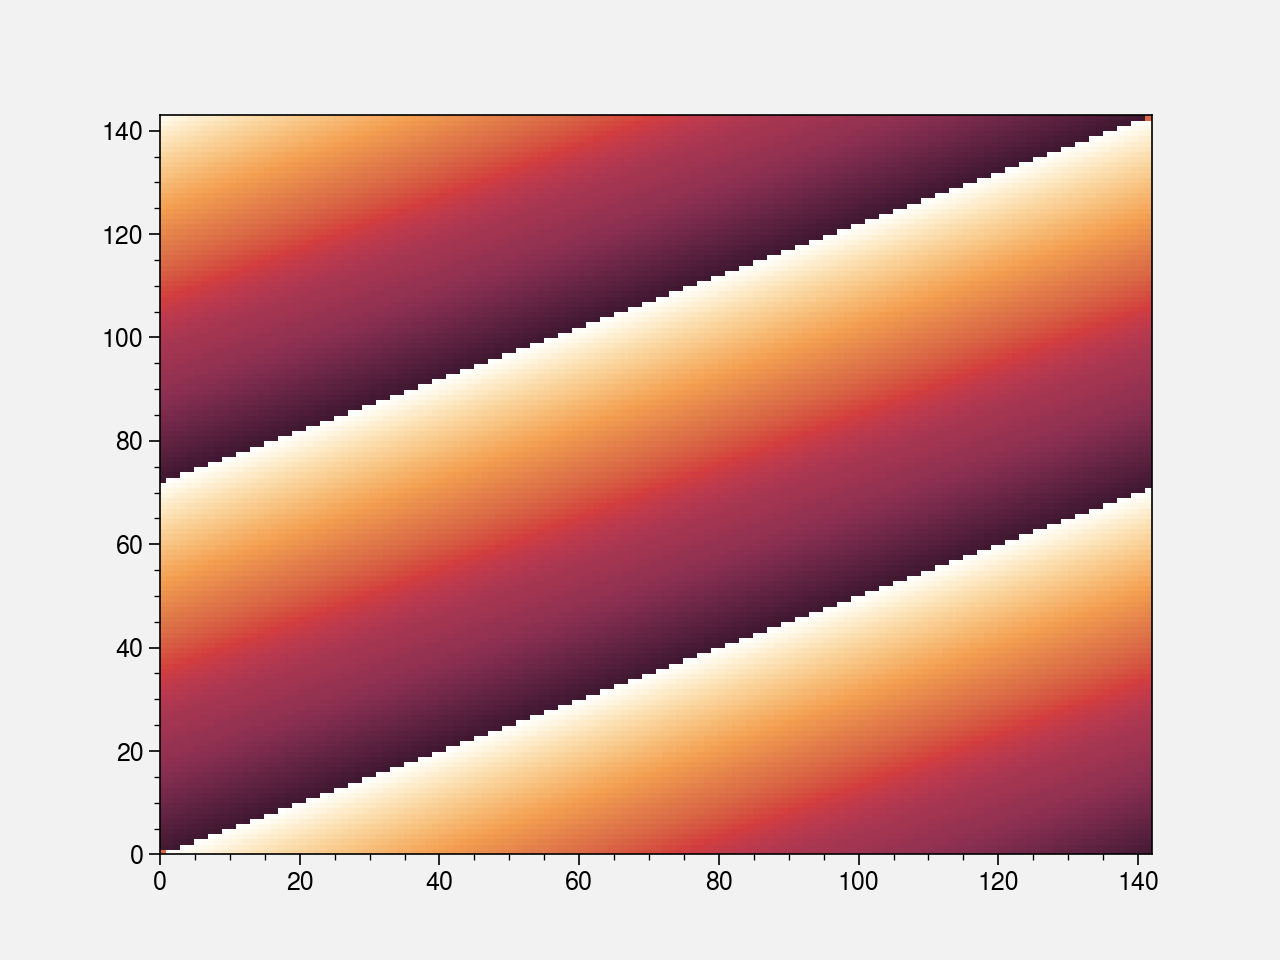

In [85]:
plt.pcolormesh(ds.longitude.values.reshape(143, 142))

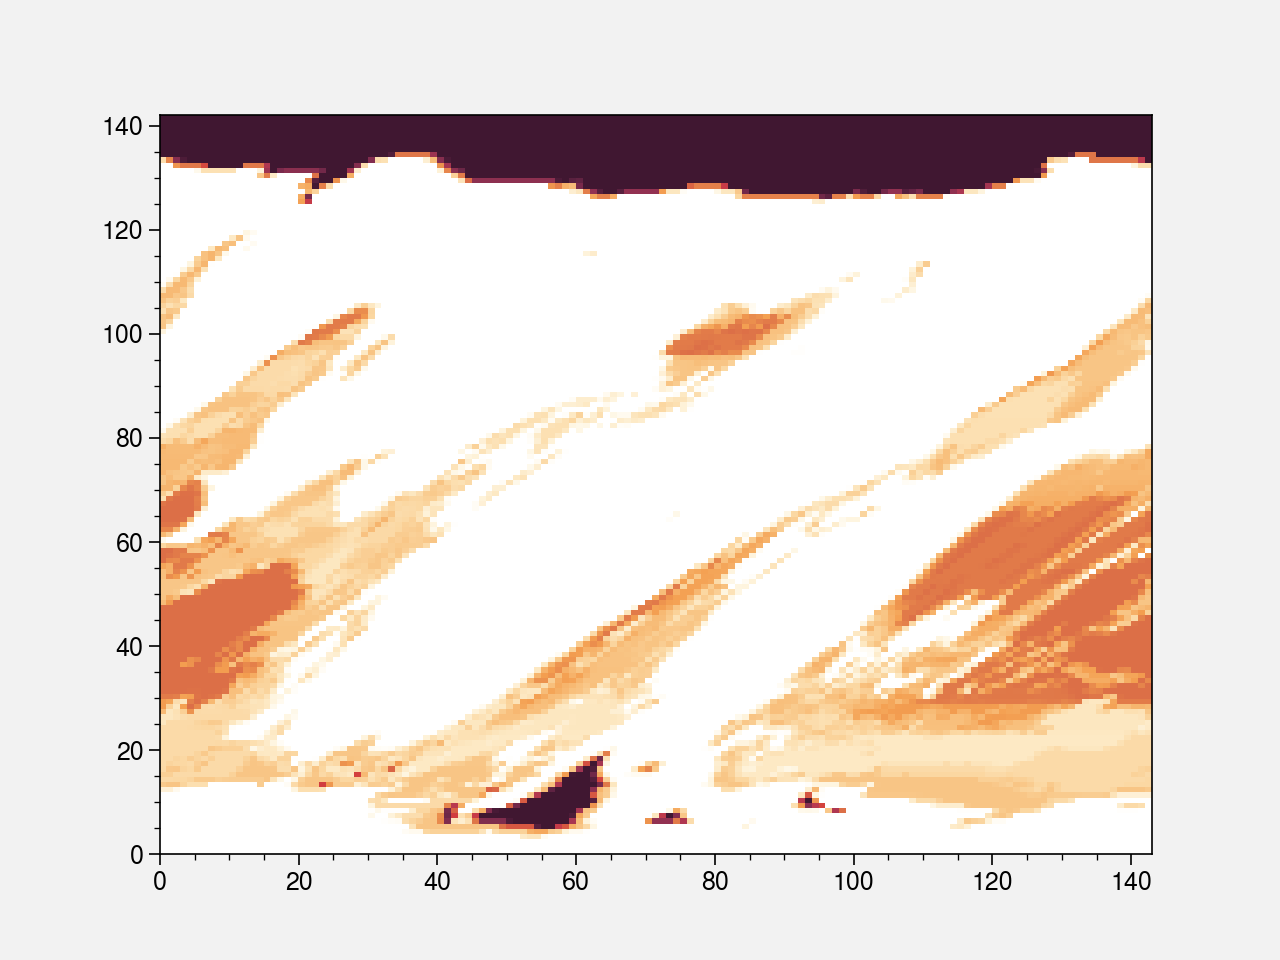

In [75]:
plt.pcolormesh(ds.ALB.values.reshape(365, 142, 143)[0])